# Optimizing Employee Retention at Energix Innovations


<div class="alert alert-block alert-success">
    <h2>About EnergiX Innovations</h2>
EnergiX Innovations (EI), a French-based manufacturer of alternative energy vehicles, boasts a workforce exceeding 100,000 employees. They are dedicated to every aspect of the vehicle production process, including research, design, construction, validation, and distribution of electric, solar, algae, and hydrogen-powered vehicles. Through their comprehensive vertical integration model, AE has ascended to a position of global prominence, standing at the forefront of the convergence between alternative energy solutions and the automotive industry.    
</div>

<div class="alert alert-block alert-success">
    <div class='business-problem' align='left'>
        <h2>Business Problem and Project Goal</h2>
        <p></p>EI is currently experiencing a significant turnover rate among its employees, involving both voluntary resignations and involuntary departures. This high turnover rate results in substantial financial costs. Considering the considerable investments made in recruitment, training, and skill development, predicting employee departures and understanding the underlying reasons could significantly enhance corporate culture, reduce overall financial costs, and consequently foster company growth. To tackle this issue, the project's primary focus is on predicting employee departures and comprehending the root causes to improve retention.</p>
        <h4>Question: What's likely to make an employee leave the company?</h4>
        <p>The goal of our predictive model is to discern the factors that contribute to an employee's decision to leave based on attributes such as salary, satisfaction_level, last_evaluation, employment_status, etc. Given that the goal is to understand underlying patterns and indicators that suggest an employee is more or less inclined to leave, the most appropriate evaluation metric would be <b>Feature Importance</b> in addition to <b>Precision</b>.</p>
    </div>
</div>

<div class="alert alert-block alert-success">
    <div class='objectives' align='left'>
        <h2>Objectives</h2>
            <ul> 
                <li>Clean, preprocess, and organize the data for analysis.</li>
                <li>Utilize various visualizations (e.g., scatter plots, histograms, box plots, correlation matrices) to comprehend relationships between variables and identify turnover-related patterns.</li>
                <li>Experiment with statistical models (e.g., logistic regression) and machine learning techniques (e.g., decision trees, random forests, XGBoost) to predict employee turnover.</li>
                <li>Analyze the model outcomes to pinpoint the primary factors influencing turnover.</li>
                <li>Formulate actionable strategies to enhance retention based on the model's findings (e.g., improving work conditions, fostering career development, enhancing management practices).</li>
            </ul>
    </div>
</div>

<div class="alert alert-block alert-info">
    <h2>Project Phases</h2>
    <b>HINT:</b> Using the links below to navigate to the relevant sections
</div>


- [**1. Exploratory Data Analysis (EDA**)](#1.-Data-Analysis-and-Exploration)
    - [Load Packages & Modules](#Load-Packages-&-Modules)
    - [Import Dataset](#Import-Dataset)
    - [Renaming Columns](#Renaming-Columns)
    - [Checking for Missing Values](#Checking-for-Missing-Values)
    - [Removing Duplicates](#Removing-Duplicates)
    - [Encoding Categorical Variables](#Encoding-Categorical-Variables)
    - [Identifying and Removing Extreme Outliers](#Identifying-and-Removing-Extreme-Outliers)
    - [Exporting Cleaned Dataset](#Exporting-Cleaned-Dataset)
***  
- [**2. Data Exploration**](#2.-Data-Exploration)
    - [Generating Assumptions](#Generating-Assumptions)
    - [Correlation Matrix](#Correlation-Matrix)
    - [Feature Comparisons](#Feature-Comparisons)
    - [Visualising Feature Distributions](#Visualizing-Feature-Distributions)
    - [Insight Overview and Conclusion](#Insight-Overview-and-Conclusion)
***   
- [**3. Model Development and Evaluation**](#3.-Model-Development-and-Evaluation)
    - [Building a Logistic Regression Model](#Building-a-Logistic-Regression-Model)
    - [Building a Decision Tree Model](#Building-a-Decision-Tree-Model)
    - [Building a Random Forest Model](#Building-a-Random-Forest-Model)
    - [Evaluating Model Results](#Evaluating-Model-Results)
    - [Plotting a Confusion Matrix](#Plotting-a-Confusion-Matrix)
    - [Plotting Feature Importance](#Plot-Importance)
 ***
- [**4. Concluding Results and Next Steps**](#4.-Concluding-Results-and-Next-Steps)
    - [Conclusing Insights](#Concluding-Insights)
    - [Business Recommendations](#Business-Recommendations)
    - [Model Evaluation and Next Steps](#Model-Evaluation-and-Next-Steps)

***
***

## Pace Stage - Analyze

# 1. Data Analysis and Exploration
[**Link To Top**](#Optimizing-Employee-Retention-at-Energix-Innovations) | [**Next**](#2.-Data-Exploration) 

***

#### Load Packages & Modules

In [303]:
# Import packages
from datetime import datetime
import time
import pickle 

# Basic EDA Packages 
import pandas as pd
pd.options.mode.chained_assignment = None  #silences exception
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# (Sklearn) Modelling and Evaluation
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, \
roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree

# XGBoost Modelling and Evaluation
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

print('Import Successful!')
print(f'Pandas: {pd.__version__}')

Import Successful!
Pandas: 2.1.3


---
#### Import Dataset

In [304]:
# 1. Set pandas option to display all rows and columns
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# 2. Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

Variable  |Description |
:-----|:-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [305]:
# 1. Return the top five rows of the dataset
df0.head(n=5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [306]:
# 2. Return the last five rows of the dataset
df0.tail(n=5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [307]:
# 3. Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [308]:
# 4. Further investigate `department`
df0['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [309]:
# 5. Investigate 'salary'
df0['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

---
#### Renaming Columns

As a data cleaning step, let's standardize the column names so that they are all in `snake_case`, and correct any column names that are misspelled.

In [310]:
# 1. Display all column names
for column in df0: 
    print(column)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [311]:
# 2. Rename and standardize column names
df0.rename(columns={'number_project': 'number_of_projects',
                    'average_montly_hours': 'average_monthly_hours', 
                    'time_spend_company': 'employment_duration', 
                    'Work_accident': 'safety_incident', 
                    'left':'employment_status',
                    'promotion_last_5years': 'promotion_last_five_years', 
                    'Department': 'department', 
                   }, 
           inplace=True
          )

# 3. Display all column names after the update
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   satisfaction_level         14999 non-null  float64
 1   last_evaluation            14999 non-null  float64
 2   number_of_projects         14999 non-null  int64  
 3   average_monthly_hours      14999 non-null  int64  
 4   employment_duration        14999 non-null  int64  
 5   safety_incident            14999 non-null  int64  
 6   employment_status          14999 non-null  int64  
 7   promotion_last_five_years  14999 non-null  int64  
 8   department                 14999 non-null  object 
 9   salary                     14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


---
#### Checking for Missing Values

Check for any missing values in the dataset

In [312]:
# Check for missing values
print('Number of Missing Values', ':', df0.isna().sum().sum())

Number of Missing Values : 0


---
#### Removing Duplicates

Check for any duplicate entries in the dataset.

In [313]:
# 1. Return a count of duplicate values
print('Number of Duplicated Values:', df0.duplicated().sum())

Number of Duplicated Values: 3008


In [314]:
# 2. Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep=False)].head(n=5)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,employment_duration,safety_incident,employment_status,promotion_last_five_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [315]:
# 3. Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()

# 4. Return the count of duplicated values 
print('Number of Duplicated Values', ':', df.duplicated().sum())

Number of Duplicated Values : 0


In [316]:
# 5. Return a summary statistic to confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   satisfaction_level         11991 non-null  float64
 1   last_evaluation            11991 non-null  float64
 2   number_of_projects         11991 non-null  int64  
 3   average_monthly_hours      11991 non-null  int64  
 4   employment_duration        11991 non-null  int64  
 5   safety_incident            11991 non-null  int64  
 6   employment_status          11991 non-null  int64  
 7   promotion_last_five_years  11991 non-null  int64  
 8   department                 11991 non-null  object 
 9   salary                     11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


---
#### Encoding Categorical Variables

Identifying categorical columns solely based on its datatype can be challenging, especially when the categorical columns are represented using numerical values. There are several ways we can approach this problem,  the most simplest method is to manually inspect the nature of the values in the columns to confirm if these columns should be treated as categorical. 

In [317]:
# 1. Return a descriptive statistic of the dataset to identify categorical variables
df.describe(include='all')

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,employment_duration,safety_incident,employment_status,promotion_last_five_years,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Inspecting the $min$, $25th$, $50th$ and $75th$ percentile values can give us a good indication into whether these columns represent categories rather than continuous numerical values. From our output we can see that `safety_incident`, `employment_status`, `promotion_last_five_years` most likely fit this description. 

`department` and `salary` return NaN values, from what we understand from our earlier analysis, `department` contains 8 categories each referencing a different department, and `salary` contains 3 categories `low`, `medium` and `high`. Before we move foward, selecting the appropriate encoding method is vital to prevent introducing unintended relationships between categorical values. 

***

In `Module 3 - Go Beyond Numbers - Translate Data Into Insights: Cleaning Your Data` we learned about the different forms of transforming categorical or qualitative datatypes. The two main types are `label_encoding` and `one-hot encoding`, both have their advantages and disadvantages. There's no simple answer to what method we should use but here are some guidelines to help us make our decision: 

- `Label Encoding` - is a data transformation technique where each data value is assigned a distinct number instead of a qualitative value. The question is, does that equidistant relationship accurately represent the relationships between the various categories? Another question to ask is after encoding, would our visualization or ML model treat the encoded labels as a ranking? The advantage with Label encoding is that it reduces the dimensionality of the dataset compared to one-hot encoding. For example, having fewer branches in a decision tree model can lead to simpler and less overfitting models.
- `One-hot Encoding` - is also a data transformation technique where a new column is created for each category type, then a 0 or a 1 is assigned for each value, 0 meaning no and a 1 meaning yes. One hot encoding is usually best for smaller amount of categorical variables and for categories that have no order. 

It's often good practice to try different methods and assess which one works best for our specific data and the overall model performance, however in attempts to reduce the dimensionality introduced by one-hot encoding, and to simplify interpretation, we are going to proceed with encoding our variables using `label encoding`. 

In [318]:
# 2. Convert column from numeric datatype into categorical
df[['safety_incident', 'employment_status', 'promotion_last_five_years']] = df[['safety_incident', 'employment_status', 'promotion_last_five_years']].astype('category')

In [319]:
# 3. Using sklearns `LabelEncoder`, encode `salary` with an integer value for each category
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])

In [320]:
# 4. Using sklearns `LabelEncoder`, encode `department` with an integer value for each category
df['department'] = label_encoder.fit_transform(df['department'])

In [321]:
# 5. Return a summary statistic to confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   satisfaction_level         11991 non-null  float64 
 1   last_evaluation            11991 non-null  float64 
 2   number_of_projects         11991 non-null  int64   
 3   average_monthly_hours      11991 non-null  int64   
 4   employment_duration        11991 non-null  int64   
 5   safety_incident            11991 non-null  category
 6   employment_status          11991 non-null  category
 7   promotion_last_five_years  11991 non-null  category
 8   department                 11991 non-null  int64   
 9   salary                     11991 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 784.9 KB


---
#### Identifying and Removing Extreme Outliers

Outliers can effect the splitting criteria in decision trees and random forests and could potentially skew predictions. Its vital that we assess the impact of outliers on the model's performance as some outliers may contain valuable information.  

Here are some considerations regarding outliers. 

 - Outliers in the `outcome variable`, can have a direct impact on the model's predictions. It's generally good practice to investigate and potentially handle outliers in the outcome variable. 
 - Outliers in the `predictor variable` can also influence the model's coefficients and predictions. Removing outliers from predictor variables can sometimes lead to a more stable and reliable model. 
 
Its important to consider domain-specific implications of outlier removal. Removing outliers from only one set of variables without considering the other may lead to a mismatch in the relationships between variables. 

During our third module `Go Beyond the Numbers: Translating Data into Insights` we learned about the three types of outliers `global`, `contextual` and `collective`. 

- `Global` outliers are values that are completely different from the overall data group and have no association with any other outliers. 
- `Contextual` outliers are normal data points under certain conditions but become anomalies under most other conditions. 
- `Collective` outliers are a group of abnormal points that follow similar patterns and are isolated from the rest of the population. 
 
There are several methods we can use to investigate outliers, here are three of the most common: 

-  Assessing the `Mean` and `Median` values will give us a good indication into the disribution of the data. If the mean value is less than or greater than the median i.e  the skew of the distribution (slightly left or slightly right) will tell us which side we should focus our investigation on. 
- Visulizing outliers using a boxplot. The purpose of the boxplot is to show the distribution of values seperated into quartiles. What we are most concerned with are the points above and below $(1.5 * IQR)$. 
- Finally using a scatter plot we can view the outliers in relation to the rest of the data points.  

For the purposes of this learning exercise, we will be reviewing all three methods. Lets begin by returning the total count of outliers above and below the interquartile range, so we can streamline our analysis.  

In [322]:
# 1. Create a function that determines the number of rows containing outliers
def count_outliers(df):
    
    '''
    Sum the total number of datapoints less than or greater than the lower and upper bounds
    '''

    count = {}
    
    for column in df.select_dtypes(np.number).columns:
    
        # Calculate the 25th and 75th percentiles
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
    
        # Calculate the interquartile range
        iqr = q3 - q1
    
        # Calculate the lower and upper bounds 
        lower_bound = q1 - 1.5 * iqr 
        upper_bound = q3 + 1.5 * iqr 
    
        # Return the column name and count of outliers greater and less than our thresholds 
        count[column] = len(df[(df[column] > upper_bound) | (df[column] < lower_bound)])
            
    return count

In [323]:
# 2. Save the output of the function into a dict
count_dict = count_outliers(df)

# 3. Sort the dict in ascending order of count
count_dict_sorted = dict(sorted(count_dict.items(), key=lambda x:x[1], reverse=True))

# 4. Return the column name, count outliers and mean and median values for each variable
for column, count in count_dict_sorted.items():
    print(f'{column} | Count Outliers: {count} | Mean: {df[column].mean()} | Median: {df[column].median()}')

employment_duration | Count Outliers: 824 | Mean: 3.3648569760653824 | Median: 3.0
satisfaction_level | Count Outliers: 0 | Mean: 0.6296580768910016 | Median: 0.66
last_evaluation | Count Outliers: 0 | Mean: 0.7166825118839131 | Median: 0.72
number_of_projects | Count Outliers: 0 | Mean: 3.802852139104328 | Median: 4.0
average_monthly_hours | Count Outliers: 0 | Mean: 200.4735218080227 | Median: 200.0
department | Count Outliers: 0 | Mean: 5.871153365023768 | Median: 7.0
salary | Count Outliers: 0 | Mean: 1.3561838045200567 | Median: 1.0


Out of the 7 columns that are of numeric datatype, only 1 column `employment_duration` contains outliers. The mean value for `employment_duration` is `~3.65` whereas the median value is `3.0`, indicating that the data is slighly right skewed. Let's now plot the distribution of this variable to see if removing this outlier would have any significant impact.

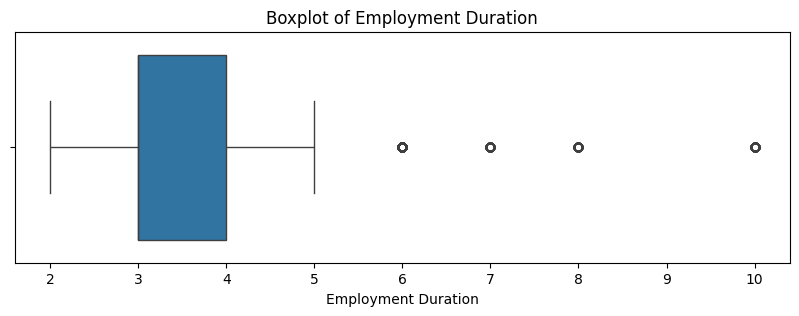

In [324]:
# 5. Create a boxplot to visualise outliers
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['employment_duration'])
plt.title('Boxplot of Employment Duration')
plt.xlabel('Employment Duration')
plt.show()

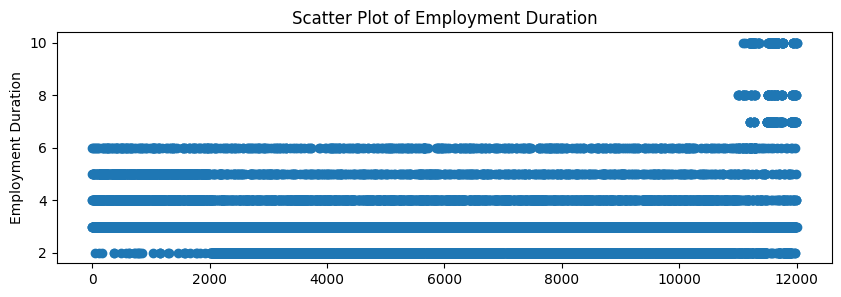

In [325]:
# 6. Create a scatter plot to visualise outliers
plt.figure(figsize=(10, 3))
plt.scatter(df.index, df['employment_duration'], label='Employment Duration')
plt.title('Scatter Plot of Employment Duration')
plt.ylabel('Employment Duration')
plt.show()

There are `824` outliers in `employment_duration`. Analysing the results of both plots show us that although these values are outlying, they follow a similar distribution to other outlying values in this feature and therefore we can conclude that they appear to be genuine information. Removing these outliers will create a class imbalance towards employees with longer tenure periods, therefore removing these values may not be recommended.  

---
#### Exporting Cleaned Dataset


In [326]:
%%bash
ls *.ipynb
# 1. Navigate to the directory of our jupyter notebook 

EnergiX--ML-Employee-Retention-Lab05.ipynb


In [327]:
# 2. Using pandas, export the dataset as a CSV to path
df.to_csv('cleaned_HR_capstone_dataset.csv')

In [328]:
%%bash 
ls *csv
# 3. Confirm file in directory

HR_capstone_dataset.csv
cleaned_HR_capstone_dataset.csv


***
***

# 2. Data Exploration
[**Link To Top**](#Optimizing-Employee-Retention-at-Energix-Innovations) | [**Previous**](#1.-Data-Analysis-and-Exploration) | [**Next**](#3.-Model-Development-and-Evaluation) 

***

### Generating Assumptions

The goal of this project is to analyze HR department-collected data and construct a model capable of predicting employee attrition. To initiate the process, let's establish initial hypotheses regarding the factors that may influence an employee's decision to leave. We will then assess these assumptions by examining combinations of features for statistically significant associations, thereby validating or refining our initial hypotheses.

**Question: What could be the potential reasons for why an employee may to leave?**

- **Lower Satisfaction Level:** Employees with a low self-reported satisfaction level may be more inclined to consider leaving, as they may not find their current work environment fulfulling or engaging. 



- **Unsatisfactory Last Evaluation:** Employees who receive lower scores in their last performance review may feel undervalued or unappreciated, potentially leading to a desire to seek new opportunities elsewhere.



- **High Workload (Number of Projects and Average Monthly Hours:** Employees with a high number of projects and long average monthly working hours might experience burnout or a work-life imbalance, which can be a strong motivator for seeking alternative employment. 



- **Long Employment Duration:** Suprisingly, very long tenure could also be a factor. Some employees may be seeking new challenges or opportunities for growth after being with the company for an extended period. 



- **Workplace Safetly Incidents:** Employees who have experiences safety incidents at work may feel concerned about their well-being and may consider leaving if they perceive a lack of safety measures. 



- **Lack of Promotions:** Employees who have not received a promotion in the last five years may feel stagnant in their current role and could be motivated to explore opportunities elsewhere for career advancement.



- **Department and Salary:** Depending on the department and salary level, employees may evaluate their job satisfaction, growth potential, and compensation in relation to industry standards, potentially influencing their decision to leave. 

***
### Correlation Matrix

Lets plot a correlation matrix to view the statistical relationship between variable pairs. A correlation heatmap can reveal the strength and direction of relationship between the variables, validate expected correlations and detect potential multicollinearity.

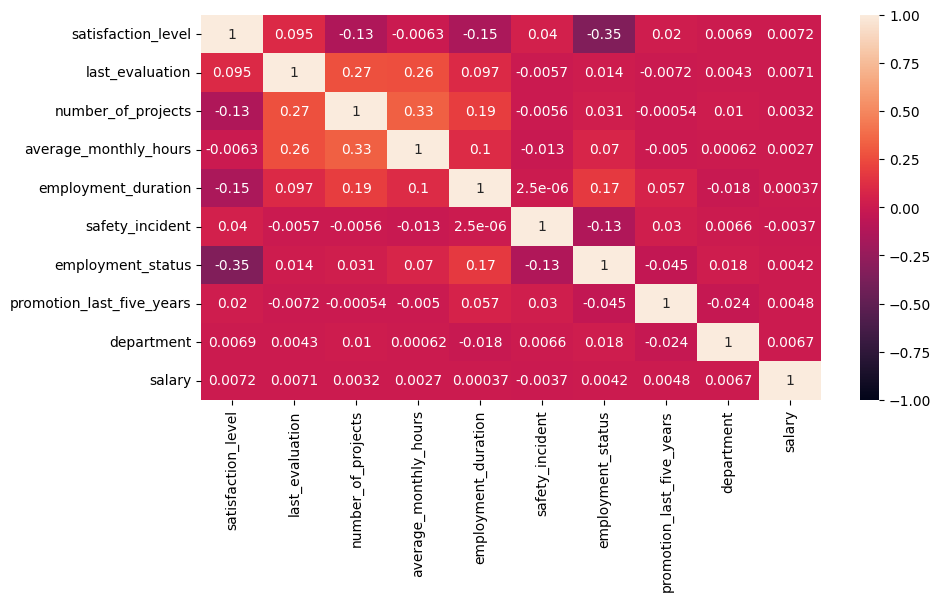

In [329]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

---
### Feature Comparisons

After formulating our initial hypotheses, it has become evident that performance-related features such as `employment_duration`, `average_monthly_hours`,`number_of_projects`, `department` and  `last_evaluation` play a significant role in influencing `employment_status`. To gain deeper insights into this recurring pattern, we will now compare the following features that potentially contribute to employee turnover.


- **Number of Projects and Average Monthly Hours**: This combination of features allow us to explore the relationship between workload intensity (Number of Projects) and the amount of time spent on tasks (Average Monthly Hours), providing insights into potential impacts on productivity and work-life balance. 


- **Last Evaluation and Average Monthly Hours**: Examining the relationship between the average monthly hours worked and an employees last evaluation score can shed light on how workload may be correlated with performance assessments.


- **Satisfaction Level and Average Monthly Hours**: Examine whether there's a connection between job satisfaction levels and the number of hours an employee invests in their work. 


- **Salary Levels and Employment Status**: Allow us to understand if salary levels play a role in an employee's decision to stay or leave the company. It provides insights into the potential impact of compensation on retention. 


- **Satisfaction Level and Employment Status**: We can gain insights into the correlation between job satisfaction and the likelihood of an employee leaving the company, revealing factors influencing employee retention.


- **Promotion Last Five Years and Employment Status**: Examining the relationship between promotions received in the last five years and their employment status will help form an approach to employee retention.


- **Department and Employment Status**: By considering both the department an employee belongs to and their employment status, we can gain insights into department-specific retention patterns. This allows for targeted strategies to address retention within specific departments.

----

## Visualizing Feature Distributions


<p>After completing our initial EDA, our dataset now contains 11,991 rows and 10 columns: </p>
<h3 style='padding: '10px'></h3>
    <table class='table data-dict' style='text-align:left'>
        <thead> 
            <tr> 
                <th>Variable</th> 
                <th>Description</th> 
            </tr> 
        </thead> 
        <tbody> 
            <tr> 
                <th scope='row_1'>satisfaction_level</th> 
                <td>Employee-reported job satisfaction level [0-1]</td> 
            </tr>
            <tr>
                 <th scope='row_2'>last_evaluation</th> 
                <td>Score of employee's last performance [0-1]</td> 
            </tr> 
            <tr>
                 <th scope='row_3'>number_of_projects</th> 
                <td>Number of projects employee contributes [0-1]</td> 
            </tr> 
            <tr>
                 <th scope='row_4'>average_monthly_hours</th> 
                <td>Average number of hours employee worked per month</td> 
            </tr> 
            <tr>
                <th scope='row_5'>employment_duration</th> 
                <td>How long the employee has been with the company (years)</td> 
            </tr> 
            <tr>
                 <th scope='row_6'>safety_incident</th> 
                <td>Whether or not the employee experiences an accident while at work [0-1]</td> 
            </tr> 
            <tr>
                 <th scope='row_6'>employment_status</th> 
                <td>Whether or not the employee left the company [0-1]</td> 
            </tr> 
            <tr>
                 <th scope='row_7'>promotion_last_five_years</th> 
                <td>Whether or not the employee was promoted in the last 5 years [0-1]</td> 
            </tr> 
            <tr>
                 <th scope='row_8'>department</th> 
                <td>
                    <p>The employee's department</p>
                    <ul>0 = IT</ul>
                    <ul>1 = product_mng</ul>
                    <ul>2 = accounting</ul>
                    <ul>3 = hr</ul>
                    <ul>4 = management</ul>
                    <ul>5 = RandD</ul>
                    <ul>6 = marketing</ul>
                    <ul>7 = sales</ul>
                    <ul>8 = support</ul>
                    <ul>9 = technical</ul>
                </td>
            </tr> 
            <tr>
                 <th scope='row_9'>salary</th> 
                <td>
                    <p>The employee's salary (U.S dollars)</p>
                    <ul>1 = low</ul>
                    <ul>2 = medium</ul>
                    <ul>3 = high</ul>
                </td>
            </tr> 
        </tbody> 
    </table>

### Number of Projects and Average Monthly Hours

Examining the `number_of_projects` and `average_monthly_hours` could provide insight into whether employees with a high workload are more inclined to consider leaving. This comparision helps us understand if workload intensity directly impacts employee retention, potentially highlighting the need for workload management strategies.

This relationship can be effectively visualized using a scatter plot. As this plot type enables us to examine the distribution of data points and detect any clusters or outliers.

In [330]:
# 1. Return the min, max values for `average_monthly_hours`
mini, maxi = df['average_monthly_hours'].min(), df['average_monthly_hours'].max()
print(f'Min - Average Monthly Hours: {mini}\nMax - Average Monthly Hours: {maxi}')

Min - Average Monthly Hours: 96
Max - Average Monthly Hours: 310


In [331]:
#### Pandas returns an error when using the groupby function: "FutureWarning: The default of observed=False is deprecated...", setting observed=True silences this warning

# 2. Create 6 equal bin edges to seperate 'average_monthly_hours'
bins = list(range(50, 350, 50))

# 3. Create labels for the intervals
labels = [f"{start}-{end}" for start, end in zip(bins[:-1], bins[1:])]

# 4. Bin 'average_monthly_hours' and perform groupby
df['average_monthly_hours_interval'] = pd.cut(df['average_monthly_hours'], bins=bins, labels=labels, include_lowest=True)
avg_project_hrs = df.groupby(['number_of_projects','average_monthly_hours_interval', 'employment_status'], observed=True).size().unstack()
avg_project_hrs.reset_index(inplace=True)
avg_project_hrs.columns = ['Number of Projects', 'Average Monthly Hour Intervals', 'Stayed', 'Left']
avg_project_hrs

,Number of Projects,Average Monthly Hour Intervals,Stayed,Left
0,2,50-100,11.0,NaN
1,2,100-150,183.0,575.0
2,2,150-200,256.0,265.0
3,2,200-250,173.0,7.0
4,2,250-300,102.0,9.0
5,3,50-100,21.0,NaN
6,3,100-150,586.0,3.0
7,3,150-200,1232.0,15.0
8,3,200-250,1105.0,11.0
9,3,250-300,538.0,6.0


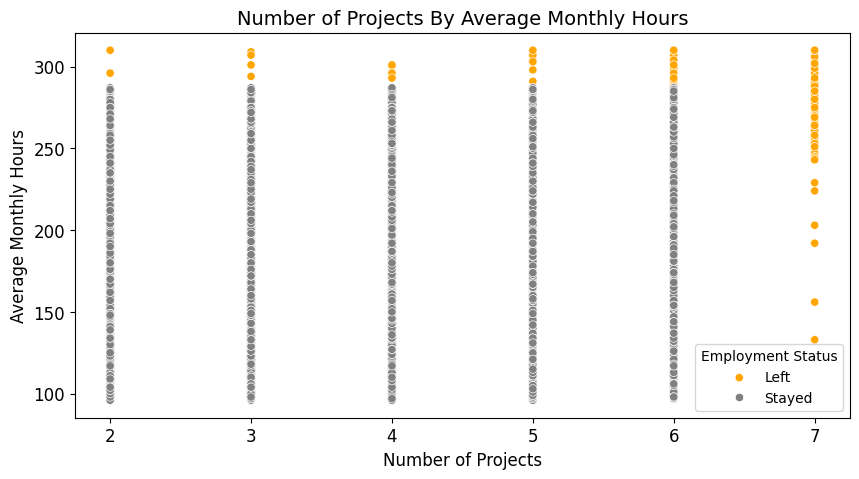

In [332]:
# 5. Set the figure size
plt.figure(figsize=(10,5))

# 6. Create the plot
sns.scatterplot(x=df['number_of_projects'], 
                y=df['average_monthly_hours'], 
                hue=df['employment_status'],
                palette=['grey', 'orange']
               )
plt.legend(title='Employment Status', loc='lower right', labels=['Left', 'Stayed'])

# 7. Set the x, y and title for the plot
plt.title('Number of Projects By Average Monthly Hours', fontsize=14)
plt.xlabel('Number of Projects', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)
plt.yticks(fontsize=12)

# 8. Show the plot
plt.show()

**Findings**

The scatter plot illustrates the relationship between `number_of_projects` and `average_monthly_hours`, with distinctions made by `employment_status`. The grey data points represent employees who stayed with the company, while the orange data points represent those who left. Here are our findings:

- Employees who logged `over 270 hours` on average per month departed from EI, regardless of their project load. This trend may stem from various factors such as overwork, potential burnout, or challenges with maintaining a healthy work-life balance.


- We observe a distinct cluster of employees who worked `less than 270 hours` and handled `2-6 projects`, indicating their tendency to stay employed at EI. This pattern (data points in grey) serves as a clear threshold before employees consider leaving.


-  Its clear to see that the majority of employees who managed `7 Projects` left EI, which supports our initial observation that overworking or challenges maintaining a healthy work-life balance contributes to employee attrition. 
  

----

### Satisfaction Levels and Average Monthly Hours

In our earlier analysis, we examined the relationship between the number of projects and average monthly hours, revealing that employees who logged over 270 hours managing six or more projects showcasing an increased likelihood of departure. To substantiate this observation, we will now delve deeper by contrasting the reported `satisfaction_level` of employees against their corresponding `average_monthly_hours`.

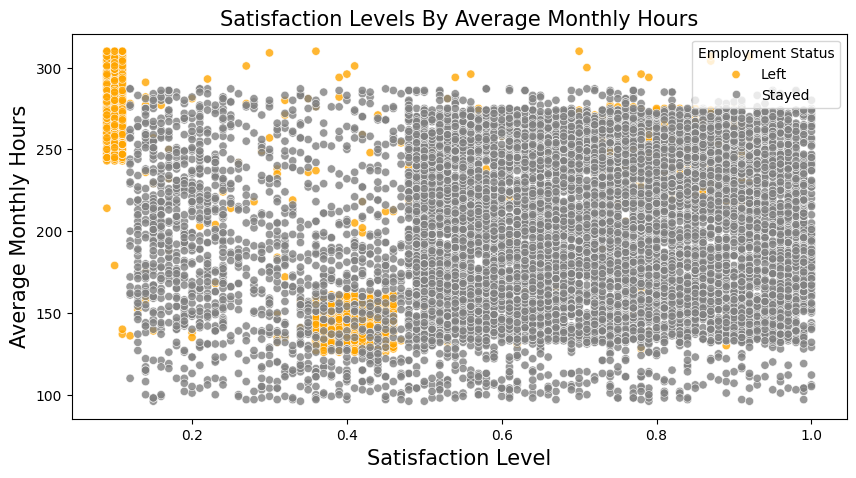

In [333]:
# 1. Set the plot window size
plt.figure(figsize=(10,5))

sns.scatterplot(x=df['satisfaction_level'], 
                y=df['average_monthly_hours'], 
                hue=df['employment_status'], 
                alpha=0.8, 
                palette=['grey', 'orange']
               )
plt.legend(title='Employment Status', loc='upper right', labels=['Left', 'Stayed'])

# 2. Create the title and x,y labels
plt.title('Satisfaction Levels By Average Monthly Hours', fontsize=15)
plt.xlabel('Satisfaction Level', fontsize=15)
plt.ylabel('Average Monthly Hours', fontsize=15)

# 3. Show the plot
plt.show()

**Findings**

The results from our findings are as follows: 

- Typically, employees with a `satisfaction_level` exceeding `0.5` tended to stay at EI. The right side of the plot (in grey) exhibits a fairly uniform pattern across the `average_monthly_hours` worked. This suggests that these employees may effectively manage their time, find enjoyment in their work, or engage in projects that don't lead to overwork.


- Employees who departed from EI tended to have a `satisfaction_level` below `~0.45` and worked fewer hours on average per month. There could be several reasons for this, including the possibility that they began 'quietly quitting' by reducing their monthly hours (as of the data collection period). They may have also been assigned to projects that did not align with their satisfaction, or experienced dissatisfaction with their work environment. *This warrants further investigation.*


- There's a distinct cluster of employees highlighted in orange who averaged around `250+ hours` per month and exhibited a `satisfaction_level` below `0.1`. This pattern might suggest two potential scenarios: they could be newly hired recruits investing extra hours during their initial period, or existing employees who were overworked and dissatisfied with their job.


-----

### Satisfaction Level and Employment Status

Previously, we noticed that employees with higher satisfaction levels were more likely to remain at EI. Now, let's delve deeper into this relationship by examining both `job_satisfaction` levels and `employment_status` to potentially discover further insights.

In [334]:
# Lets generate a view that groups the count of employees who stayed by employees who left
#  in increments of satisfaction level

# 1. Create 10 equal bin edges to seperate 'satisfaction_level'
bins = [i/10 for i in range(11)]

# 2. Create labels for the intervals
labels = [f'{i/10}-{(i+1)/10}' for i in range(10)]  

# 3. Bin 'satisfaction_level' and perform groupby
df['satisfaction_interval'] = pd.cut(df['satisfaction_level'], bins=bins, labels=labels, include_lowest=True)

# 4. Group satisfaction interval by employment_status
satisfaction_status = df.groupby(['satisfaction_interval', 'employment_status'], observed=True).size().unstack()
satisfaction_status.reset_index(inplace=True)
satisfaction_status.columns = ['Satisfaction Interval', 'Stayed', 'Left']

# 5. Calculate the percentage who left
satisfaction_status['Percentage Left'] = round(satisfaction_status.Left / (satisfaction_status.Stayed + satisfaction_status.Left) * 100,2)

# 6. Display the result
satisfaction_status

,Satisfaction Interval,Stayed,Left,Percentage Left
0,0.0-0.1,NaN,313.0,NaN
1,0.1-0.2,471.0,210.0,30.84
2,0.2-0.3,396.0,13.0,3.18
3,0.3-0.4,351.0,424.0,54.71
4,0.4-0.5,752.0,454.0,37.65
5,0.5-0.6,1639.0,27.0,1.62
6,0.6-0.7,1681.0,25.0,1.47
7,0.7-0.8,1673.0,220.0,11.62
8,0.8-0.9,1528.0,269.0,14.97
9,0.9-1.0,1509.0,36.0,2.33


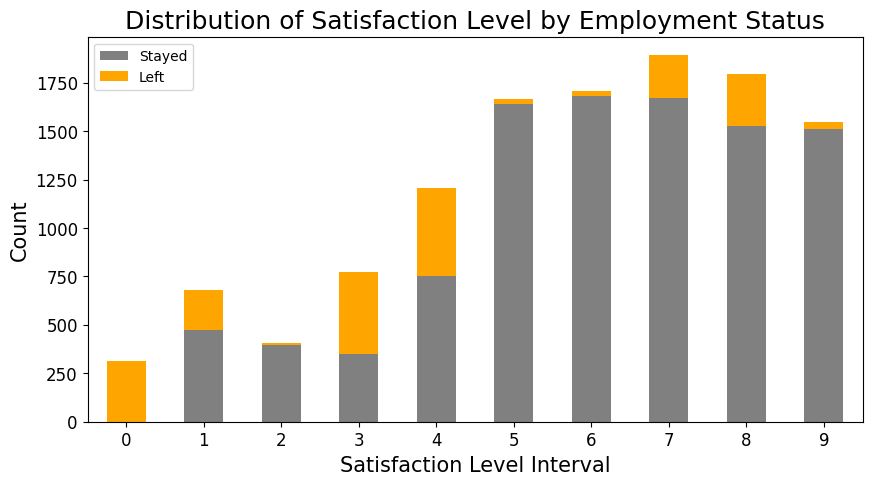

In [335]:
# 6. Set the plot window size
fig, ax = plt.subplots(figsize=(10,5))

# 8. Create the plot
satisfaction_status[['Satisfaction Interval', 'Stayed', 'Left']].plot(kind='bar', 
                                                                      stacked=True, 
                                                                      color=['grey', 'orange'], 
                                                                      ax=ax
                                                                     )

# 9. Set the title, and x,y labels  
plt.title('Distribution of Satisfaction Level by Employment Status', fontsize=18)
plt.xlabel('Satisfaction Level Interval', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Count', fontsize=15)
plt.yticks(rotation=0, fontsize=12)

# 10. Show the plot
plt.show()

#### Findings 

Plotting `satisfaction_level` against `employment_status` reveals the following: 

- Before conducting our analysis, we hypothesized that employees with lower satisfaction levels would be more likely to leave. Our findings support this hypothesis, revealing that a significant `45.27%` of employees with a `satisfaction_level` below `0.5` ultimately chose to leave EI.  


- The majority of employees who indicated a `satisfaction_level` between `0.5 - 0.6` chose to stay. This could imply that they might have provided a neutral score, indicating that they weren't entirely satisfied with their EI experience but opted to remain employed for personal or financial reasons. Alternatively, their dissatisfaction could be related to factors such as salary or the work environment, which might impact this score. Drawing a conclusive interpretation from this finding requires a deeper analysis of additional information.


- A suprising finding is that a relatively large number approximately `12 - 15%` of employees who reported a `satisfaction_level` of `0.7 - 0.9` in comparison to the `1.5 - 2%` of employees who reported a satisfaction score between `0.5 - 0.7`, left EI. This is an interesting finding as we would generally assume that employees who report that they are satisfied working at EI would remain employed. 


----

### Salary and Employment Status

As industry standards continue to evolve, it's reasonable to expect that employees should perceive increased workloads as an indication of their expanding responsibilities. One of the assumptions we formulated during our Exploratory Data Analysis (EDA) is that elements associated with `salary` may significantly impact an employee's growth trajectory, ultimately influencing their `employment_status`. To gain deeper insights, let's now turn our attention to the examination of these two features.

In [336]:
# 1. Create a salary by employment status view
salary_status = df.groupby(['salary', 'employment_status'], observed=True).size().unstack()
salary_status

employment_status,0,1
salary,,
0,942,48
1,4566,1174
2,4492,769


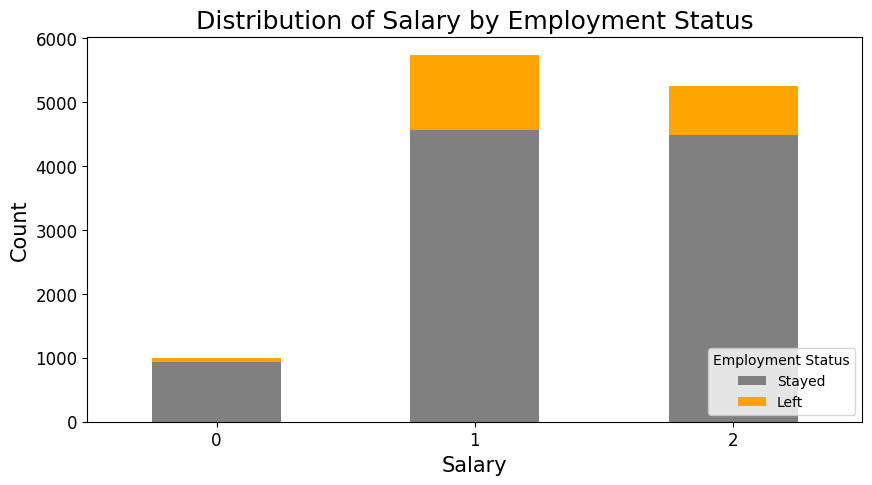

In [337]:
# 3. Set the plot window size
fig, ax = plt.subplots(figsize=(10,5))

# 4. Create the plot
salary_status.plot(kind='bar', stacked=True, color=['grey', 'orange'], ax=ax)
plt.legend(title='Employment Status', loc='lower right', labels=['Stayed', 'Left'])

# 5. Set the title, x and y labels
plt.title('Distribution of Salary by Employment Status', fontsize=18)
plt.xlabel('Salary', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Count', fontsize=15)
plt.yticks(rotation=0, fontsize=12)

# 6. Show the plot
plt.show()

**Findings** 

The findings from our plot shows us the following: 

- `20.45%` of employees with a `Low` salary left compared to the `14.62%` of medium salaries and `4.85%` from high salaries, which aligns with our initial assumption that `salary` is correlated with `employment_status`. 
 
----

### Average Monthly Hours and Last Evaluation

Previously we compared the distribution between `satisfaction_level` and `average_monthly_hours` and had concluded that overworking was the primary cause of departure at EI. An alternate conclusion could be that they were involved in projects that they were inexperienced in handling causing them to be overworked. To confirm or refute this hypothesis lets plot the correlation between `average_monthly_hours` and `last_evaluation` to understand if their performance review uncovers any correlation to their departure. 

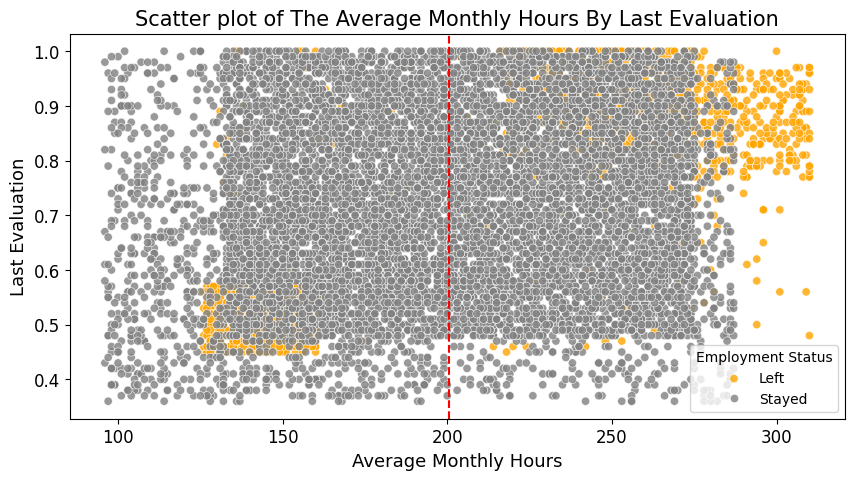

In [338]:
# 1. Set the plot window size
plt.figure(figsize=(10,5))

# 2. Create the plot and add a vertical line at the mean
sns.scatterplot(x=df['average_monthly_hours'],
                y=df['last_evaluation'], 
                hue=df['employment_status'], 
                alpha=0.8, 
                palette=['grey', 'orange']
               )
plt.legend(title='Employment Status', loc='lower right', labels=['Left', 'Stayed'])
plt.axvline(x=df['average_monthly_hours'].mean(), color='red', ls='--')

# 3. Set the title, x and y labels
plt.title('Scatter plot of The Average Monthly Hours By Last Evaluation', fontsize=15)
plt.xlabel('Average Monthly Hours', fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Last Evaluation', fontsize=13)
plt.yticks(rotation=0, fontsize=12)

# 4. Show the plot
plt.show()

**Findings**

The scatter plot reveals three distinct clusters:

- **Cluster A**: This group comprises of employees who worked approximately `130 - 160 hours` per month and received evaluation scores ranging from `~0.45 - 0.59` before leaving EI. This finding aligns with our hypothesis that employees who performed poorly, either could not keep up with the workload, could not manage their time well or were disatisfied with the work environment, and started working fewer hours before quitting.


- **Cluster B**: Employees working between `~130 - 270 hours` monthly, with evaluation scores ranging from `~0.5 - 1.0`, chose to stay at EI. It's evident that a majority of employees, falling within `1 standard deviation` above and below the mean for average monthly hours, effectively managed their time, resulting in commendable performance.


- **Cluster C**: Surprisingly, this group worked approximately `220 - 320 hours` monthly and reported last evaluation scores between `~0.8 - 1.0`, yet chose to leave EI. This finding is unexpected, as one would generally assume that high-achieving employees working over `1 standard deviation` above the mean for average monthly hours would remain employed at EI. However, there could be several contributing factors, such as promotion status, potential burnout due to poor work-life balance, and other relevant considerations."

---

### Promotion Last Five Years and Employment Status

A suprising finding in our previous observation looking at `last_evaluation` and `average_monthly_hours` was that several high performing employees chose to leave EI. This findings correlates with one of our initial observations that employees who are not recognised for their efforts / did not receive a promotion in the last five years may feel stagnant in their current role which could contribute to their departure. Lets investigate this further.

In [339]:
# 1. Group `Department`,`promotion_last_five_years` by `employment_status`
promotion_status = df.groupby(['promotion_last_five_years', 'employment_status'], observed=True).size().unstack()
promotion_status.reset_index(inplace=True)
promotion_status.columns = ['Promotion Last Five Years', 'Stayed', 'Left']

# 2. Calculate the percentage left
promotion_status['Percentage Left'] = round((promotion_status.Left / promotion_status.Stayed)*100,2)
promotion_status

,Promotion Last Five Years,Stayed,Left,Percentage Left
0,0,9805,1983,20.22
1,1,195,8,4.10


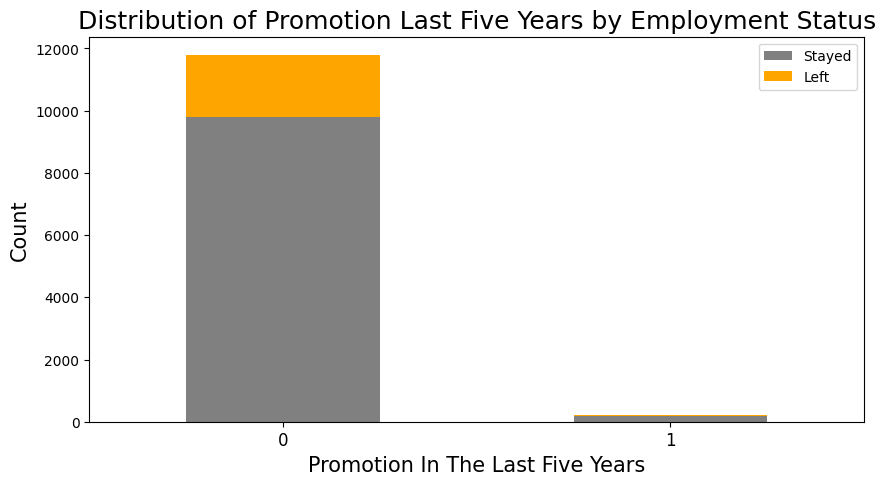

In [340]:
# 3. Set the plot window size
fig, ax = plt.subplots(figsize=(10,5))

# 4. Create the plot
promotion_status[['Stayed', 'Left']].plot(kind='bar', stacked=True, ax=ax, color=['grey', 'orange'])

# 5. Set the title, x and y labels
plt.title('Distribution of Promotion Last Five Years by Employment Status', fontsize=18)
plt.xlabel('Promotion In The Last Five Years', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Count', fontsize=15)

# 6. Show the plot
plt.show()

**Findings**

The results from our plot show the following:

- Its clear to see that `promotion_last_five_years` does have an impact on `employment_status` with `20.22%` of employees who did not receive a promotion in the last five years leaving in comparison to the `4.10%` of employees who did. 

---

### Department and Employment Status

Out of the `11788` employees who did not receive a promotion in the last five years, `20.22%` / `1983 employees` left the company. Its clear to see that not being recognised for their efforts, i.e being promoted at work has a significant impact on retention. To narrow down which department has the majority of departing employees, lets plot `department` against `employment_status` so that we could inform a strategy that could rectify this.   

In [341]:
# 1. Group `department` and `employment_status` into `department_status`
department_status = df.groupby(['department', 'employment_status'], observed=True).size().unstack()
department_status.reset_index(inplace=True)
department_status.columns = ['Department', 'Stayed', 'Left']

# 2. Calculate the percentage left
department_status['Percentage Left'] = round(department_status.Left / (department_status.Stayed + department_status.Left) * 100,2)
department_status

,Department,Stayed,Left,Percentage Left
0,0,818,158,16.19
1,1,609,85,12.25
2,2,512,109,17.55
3,3,488,113,18.80
4,4,384,52,11.93
5,5,561,112,16.64
6,6,576,110,16.03
7,7,2689,550,16.98
8,8,1509,312,17.13
9,9,1854,390,17.38


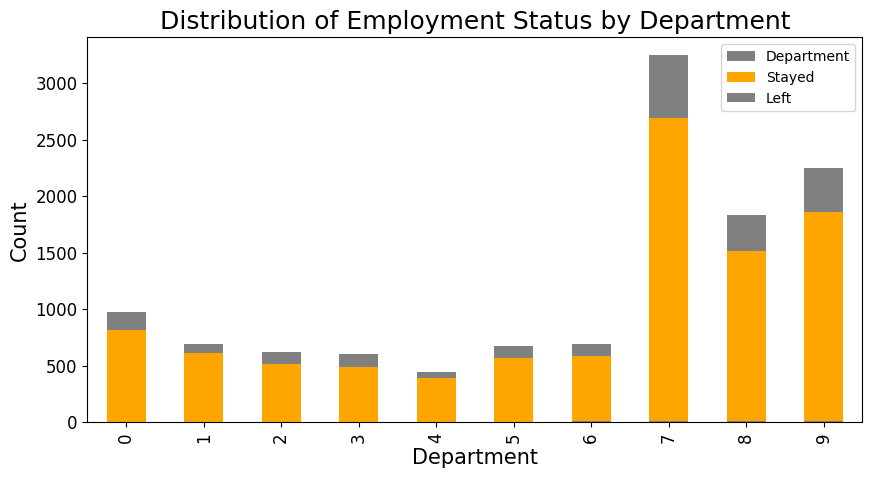

In [342]:
# 3. Set the plot window size
fig, ax = plt.subplots(figsize=(10,5))

# 4. Create the plot
department_status[['Department', 'Stayed', 'Left']].plot(kind='bar', stacked=True, color=['grey', 'orange'], ax=ax, fontsize=12)

# 5. Set the title and x, y labels 
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Employment Status by Department', fontsize=18)

# 6. Show the plot
plt.show()

**Findings**

The results from our plot reveals the following:

- The `Sales` department has the highest count of employees,`(3239)`, and the greatest number of employees who left, `(550)`. 
- `HR - 18.80%` ,  `Accounting - 17.55%` and `Technical - 17.38%` have the highest percentage of employees who left.
- In general there doesn't seem to be a significant variation in the number of employees who left across all departments. 

---

## Insight Overview and Conclusion

**What insights can you gather from the plots you created to visualize the data?**

We began our analysis by looking at the number of hours spent working on projects and how that interlinks with job satisfaction, we then analysed salary received and the number of promotions in the last five years against department to further build on our understanding. To no suprise, what we found was the main driver of employee attrition was caused by the number of projects managed by employees and whether or not they were rewarded for their efforts. i.e Employees who overworked either felt burned out or felt that they were not fairly compensated for their work and as result, decided to leave EI. 

***
***

## Pace Stage - Construct 

# 3. Model Development and Evaluation
[**Link To Top**](#Optimizing-Employee-Retention-at-Energix-Innovations) | [**Previous**](#2.-Data-Exploration) | [**Next**](#4.-Concluding-Results-and-Next-Steps) 

*** 

Our objective in this analysis is to develop a model that can effectively predict employee attrition. Given that our outcome variable, `employment_status`, is binary (with `1` indicating `left` and `0` indicating `did not leave`), we have the option to employ either a `Logistic Regression Model` or a `Tree-based Model`. While each approach comes with its own set of strengths and weaknesses, for the sake of comprehensive learning, we will proceed to construct both models. 

1. Drop Unnecessary Columns
2. Encode Categorical Variables

***
#### Dropping Columns

In [343]:
# 1. Create a copy of the dataset
df_md = df.copy()

# 2. Drop unnecessary columns that we created during EDA
df_md.drop(columns=['average_monthly_hours_interval', 'satisfaction_interval'], axis=1, inplace=True)

***

## Building a Logistic Regression Model

- Select the Dependent and Independent Variables
- Split the data (Training/Testing/Validation)
- Instantiate the classifier and fit the model
- Using the model to predict on the test data
- Plot a Confusion Matrix
- Create a Classification Report
- Evaluate the Linear Regression Model

---
#### Selecting Features

In [344]:
# 1. Create a copy of the dataframe 
df_lrm = df_md.copy()

# 2. Isolate the outcome variable
y = df_lrm['employment_status']
y.name

'employment_status'

In [345]:
# 3. Select the independent features
X = df_lrm.copy()
X.drop(columns=['employment_status'], inplace=True)
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'employment_duration', 'safety_incident',
       'promotion_last_five_years', 'department', 'salary'],
      dtype='object')

#### Splitting The Data (Training and Testing Sets)

Split the data into training and testing datasets, the default `test size` outlined by sklearn is `0.25` - `75% Training / 25% Testing` which is what we will be using. Set the `random_state` to a number of your choice, the most commonly used random_state value is `42` but you can use any number as long as its reproducible.

In [346]:
# 4. Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Instantiate the Classifier and Fit the Model

In [347]:
%%time
# 5. Instantiate the logistic regression classifier, fit the model and return its statistics
lrm_cf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

CPU times: user 1.38 s, sys: 19.1 ms, total: 1.4 s
Wall time: 206 ms


In [348]:
%%time
# 6. Using the classifier predict on the test data
y_pred = lrm_cf.predict(X_test)
y_pred

CPU times: user 33.5 ms, sys: 29.5 ms, total: 63 ms
Wall time: 7.12 ms


array([0, 0, 0, ..., 0, 0, 0])

---
#### Plotting a Confusion Matrix

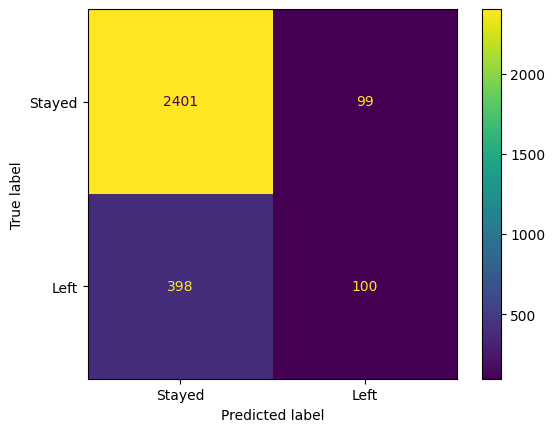

In [349]:
# 7. Compute values for confusion matrix
lrm_cm = confusion_matrix(y_test, y_pred, labels=lrm_cf.classes_)

# 8. Create display of confusion matrix
lrm_disp = ConfusionMatrixDisplay(confusion_matrix=lrm_cm, display_labels=['Stayed', 'Left'])

# 9. Plot confusion matrix
lrm_disp.plot(values_format='')

# 10. Display plot
plt.show()

#### Classification Report

In [350]:
# 11. Create classification report to evaluate the performance of the logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.96      0.91      2500
    Predicted would leave       0.50      0.20      0.29       498

                 accuracy                           0.83      2998
                macro avg       0.68      0.58      0.60      2998
             weighted avg       0.80      0.83      0.80      2998



---
#### Evaluating The Logistic Regression Model

In [351]:
df_lrm['employment_status'].value_counts(normalize=True)

employment_status
0    0.833959
1    0.166041
Name: proportion, dtype: float64

EI are interested in predicting whether an employee will leave the company, and the reasons behind their departure. Whilst traditional classification metrics (precision, recall, accuracy, f1-score) remain important - in regards to assessing the overall performance of the model, the emphasis in our case is shifted towards understanding the factors contributing towards employee attrition and uncovering the underlying reasons behind employee departure,  i.e the cost of failing to predict whether an employee will leave (false negatives) is high. Lets review the performance summary of both classes. 

- The model excels in predicting employees who stayed (predicted would not leave) with high precision, recall and f1-scores, indicating its reliability in identifying employees who are likely to stay.
- The performance in predicting employees who left (predicted would leave) is considerably weaker, displaying lower precision, recall and f1-scores, suggesting challenges in correctly identifying employees who might leave EI.
- However, there is an imbalance in the model's ability to predict both classes, highlighting the need for further improvement, particularly in correctly identifying employees who might leave.  

***

## Building a Decision Tree Model

#### Select The Features

In [352]:
# 1. Create a copy of the dataframe
df_dt = df_md.copy()

# 2. Isolate the Dependent Variable
y = df_dt['employment_status']
y.name

'employment_status'

In [353]:
# 3. Select the Independent Variables
X = df_dt.copy()
X.drop(columns=['employment_status'], inplace=True)
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'employment_duration', 'safety_incident',
       'promotion_last_five_years', 'department', 'salary'],
      dtype='object')

#### Split The Data (Training and Testing Sets)

In [354]:
# 4. Split the data into training and testing sets, by default the test_size is set to `0.25`
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### Instantiating the Classifier and Fitting the data

In [355]:
# 5. Instantiate the decision tree classifier 
dt1 = DecisionTreeClassifier(random_state=42)

# 6. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2, 3, 4, 5, 10, 15], 
             'min_samples_leaf': [1, 2, 3, 4, 5], 
             'min_samples_split': [2, 3, 4, 5, 10]
            }

# 7. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']


# 8. Instantiate the GridSearchCV object
dt_test_1 = GridSearchCV(dt1, cv_params, scoring=scoring, cv=4, refit='precision', verbose=0)

In [356]:
# 11. Open the model using pickle
with open ('dt_test_1.pickle', 'rb') as to_read:
    dt_test_1 = pickle.load(to_read)

In [357]:
# 12. Identify the optimal values for the parameters 
dt_test_1.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

#### Extracting Model Scores

In [358]:
# 13. Write a function to output the results into a dataframe
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1 or accuracy
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                        })
  
    return table

In [359]:
# 14. Get all CV scores for 'dt_test_1'
dt_model_results = make_results('Decision Tree Model-1 (Training Data)', dt_test_1, 'precision')
dt_model_results

,model,precision,recall,F1,accuracy
0,Decision Tree Model-1 (Training Data),0.970181,0.912921,0.940609,0.980874


---
## Building a Random Forest Model



#### Building The Random Forest Model

In [360]:
# 1. Intantiate the random forest classifier 
rf1 = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']


# 4. Instantiate the GridSearchCV object
rf_test_1 = GridSearchCV(rf1, cv_params, scoring=scoring, cv=4, refit='precision', verbose=0)

In [361]:
# 7. Open the model using pickle
with open ('rf_model_1.pickle', 'rb') as to_read:
    rf_test_1 = pickle.load(to_read)

In [362]:
# 8. Identify the optimal values for the parameters 
rf_test_1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [363]:
# 9. Get all the CV Scores for rf model 1
rf_model_results = make_results('Random Forest Model-1 (Training Data)', rf_test_1, 'precision')

***

### Evaluating Model Results

In [364]:
# 1. Return the decision tree model results
dt_model_results

,model,precision,recall,F1,accuracy
0,Decision Tree Model-1 (Training Data),0.970181,0.912921,0.940609,0.980874


In [365]:
# 2. Return the random forest model results
rf_model_results

,model,precision,recall,F1,accuracy
0,Random Forest Model-1 (Training Data),0.98557,0.912924,0.947776,0.98332


The evaluation scores of the Random Forest model are better than those of the Decision Tree model across precision, f1 and accuracy metrics. We are most concerned with precision score as it ensures that among the proportion of employees who left, the model accurately predicted that they would leave. 

Before we move forward with tuning our model, lets test the better performing model, i.e the Random Forest Model on our test data so that we can be sure that we can get a good representation of how well the model performs on new, unseen data.

In [366]:
# 3. Write a function to output the scores into a dataframe
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy]
                         })
  
    return table

In [367]:
# 4. Parse variables into the function 
rf1_test_scores = get_scores('Random Forest Model-1 (Testing Data)', rf_test_1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy
0,Random Forest Model-1 (Testing Data),0.98927,0.925703,0.956432,0.985991


***
### Plotting a Confusion Matrix

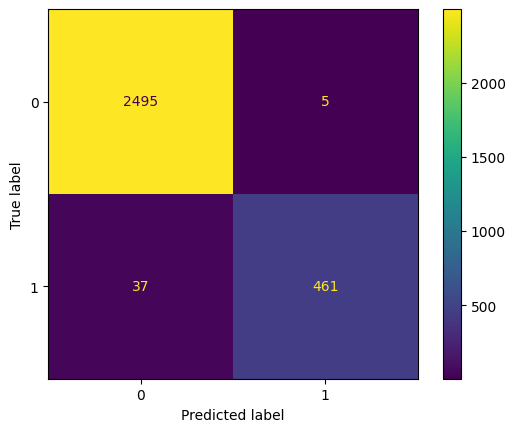

In [368]:
# 1. Compute values for the confusion matrix
preds = rf_test_1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_test_1.classes_)

# 2. Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_test_1.classes_)

# 3. Plot the confusion matrix
disp.plot(values_format='')

# 4. Display the plot
plt.show()

1. **True Negatives (2495):** True Negatives represent the number of employees correctly predicted by the model as not leaving EI, the results show that the model accurately identified a high number of employees who did not leave.  

2. **True Positives (461):** True Positives represent the number of employees correctly predicted by the model as leaving the company, and indeed, they left. With a lesser value of 461, its important to accurately identify employees who leave, so that management can take proactive measures in reducing retention.

3. **False Negatives (37):** False Negatives represent the number of employees incorrectly predicted as not leaving the company, but in fact they did leave. This is crucial as it could result in a missed opportunity to retain valuable employees.

4. **False Positives (5):** False Positives represent the number of employees incorrectly predicted as leaving the company, and in reality they did not leave and whilst this number is low, it's vital to minimize false alarms to avoid unncessary intervations in the workplace.

The observations from our confusion matrix and the results from evaluating our random forest model on our test data, indicate that the model performs relatively well in identifying employees who stayed but has very little room for improvement, especially in correctly identifying those who left. Although the model is strong, minimizing false negatives is critical in preventing the loss of valuable employees. To help improve our model's predictive performance we could carry out the following: 

 - Review and refine features used by the predictive model through feature engineering.
 - Balance the class weights: focus on giving a higher importance to the minority class (employees who did leave).
 - Optimize the models hyperparameters: experiment with the number of trees (`n_estimators`) and maximum depth of trees (`max_depth`).

***
### Plot Importance

Before we move forward let's inspect the most important features in our final model.

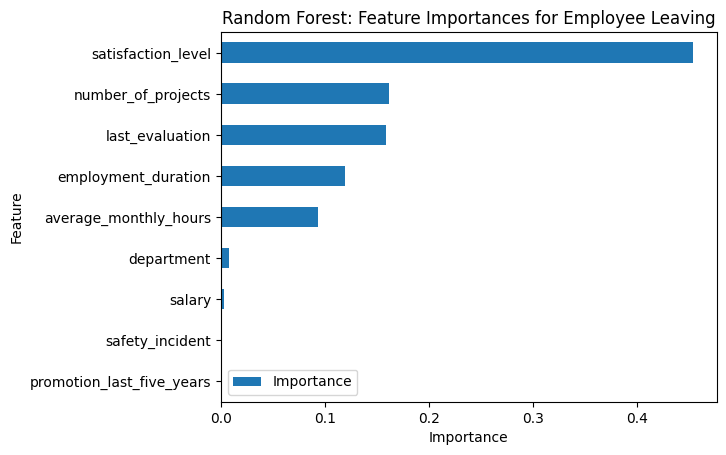

In [369]:
# 1. Get the feature importances
feature_importances = rf_test_1.best_estimator_.feature_importances_

# 2. Create a dataframe containing the feature names and their respective importance values
y_df = pd.DataFrame({'Feature':X.columns,'Importance':feature_importances})
y_sort_df = y_df.sort_values("Importance")

# 3. Create the plot
y_sort_df.plot(kind='barh', x='Feature', y='Importance')

# 4. Set the title, x and y labels 
plt.title('Random Forest: Feature Importances for Employee Leaving', fontsize=12)
plt.ylabel('Feature')
plt.xlabel('Importance')

# 5. Display the plot
plt.show()

Plotting the features highlighted by the model reveals that `satisfaction_level`, `number_of_projects`, `last_evaluation`, `employment_duration` and `average_monthly_hours` have the highest importance and are the most helpful in predicting the outcome variable `employment_status`. 

***
***


## Pace Stage - Execute

# 4. Concluding Results and Next Steps
[**Link To Top**](#Optimizing-Employee-Retention-at-Energix-Innovations) | [**Prev**](#3.-Model-Development-and-Evaluation) 

***

### Concluding Insights
Our primary goal was to construct a predictive model that could identify key factors influencing employee departure. Among the models we built—Logistic Regression, Random Forest, and Decision Tree—our Random Forest model demonstrated the most superior performance with a precision score of (`98.9%`), recall score (`92.6%`), f1-score (`95.6%`), and an accuracy score (`98.6%`). Plotting the features highlighted by the model showcased that `satisfaction_level`, `number_of_projects`, `last_evaluation`, `employment_duration`, `average_monthly_hours`, and `department` had the highest importance in predicting employee attrition.


### Business Recommendations

From the outcome of our model, we can generate several recommendations that could help mitigate employee attrition. 

- **Addressing Job Satisfaction**: Improving job satisfaction emerges as a primary concern, given its significant impact on attrition. Prioritizing regular employee feedback mechanisms, offering growth opportunities, and enhancing work-life balance can foster higher satisfaction levels.
  
- **Optimizing Workload**:  By redistributing tasks or providing adequate resources we can alleviate burnout and improve retention.
  
- **Retention Strategies**: Tailoring tasks to varying departmental needs, can nurture a sense of belonging and encourage employee loyalty.



### Model Evaluation and Next Steps
Although our random forest model demonstrated superior performance in idenifying factors related to attrition, there are several improvements we can make to our model to maintain its ability in making accurate predictions. Here are a few examples: 

- **Retraining on New Data**: Regularly updating the model with fresh data and reassessing the feature importance based on evolving trends in the workforce might improve the models performance.
  
- **Ensembling Techniques**: Exploring ensemble techniques or fine-tuning model hyperparameters could potentially refine the model's sensitivity without compromising precision.

In conclusion, continuously evaluating the models performance on new data will help our model adapt to trend changes in the workforce and ensuring the model's effectiveness in predicting employee attrition. 

***